### Problem Framing and Pitch

The user buys an Oura ring in order to monitor their every activity, level of readiness and also monitor their sleep. They can see this data as often as they like on the Oura cloud. They want to improve their lifestyle and health. However, Oura does not offer any transformative insight into why someone is sleeping they way they are.

In general we can agree:

- Everybody knows what are generally healthy habits, these lead to a good night's sleep.
- We also know that good sleep over time promotes good health and may also result in other benefits like longevity, general mental wellbeing, sense of happiness.
- So good habits lead to good sleep which further leads to good health and this cycle supports a good life.

Hence the question...Could we improve someone's sleep? We don't think of this as a simple regression or classification problem rather a 'change someone's daily habits over time' problem. We plan to build a predictive model that can show us how a set of important features can predict with a reasonable level of accuracy, someone's sleep quality __({sleep score >= 80} Quality = 'good' ; {sleep < 80} Quality = 'bad')__.This formulation mkaes our problem as a binary classification approach where we want to simply tell the user what are the factors that result in good vs bad sleep --simple is often better when we want strong end user adoption.

This can in turn help us understand what effects sleep the most in general but also what might be some common traits that are shared by a subset of individuals that result in a similar sleep experience. So we will do a few simple things here. 

We will first try to find using a range of feature evaluation methods, what features are most useful to predict the quality of sleep and we will also try to see what are some sub groups within out population and what might be some characteristics that might be common in these subgroups. 

If these characterstics that are common are also strong influencers on sleep, then we know that we could advice someone with some confidence that focusing on certain specific aspects of their daily routine could help them reach a better sleep experience.

We know that there are a lot of things in a person's life that a sensor, or any sensor cannot measure -- we can measure blood pressure but we cannot know all the factors that are effecting a person. Hence we aim at informing the individual in a manner that they can get some actionable insight that gives them a starting point into shifting their habits in a direction that will support better sleep, that will contribute to better health and a happy life.


### The Client

Our client is memento labs and their clients are those who own an Oura ring and want to learn more about their sleep and how to make it better. They have allowed us to use real data that comes from Oura ring bearers who have agreed under a strict data privacy agreement to allow us on behalf of memento labs to use this data for this purpose. The deliverables of this project are:

1) Detailed feature analysis    
2) Pipeline of predictive models    
3) Model interpretability outputs     
4) Model object that can predict sleep quality    
5) Actionable reasons from features for end user    

#### Methodology

<div class="alert alert-block alert-info">
<b>Methodology   :</b> We have developed a simple yet repeatable experiment pipeline. We will complete the following 5 steps below and provide a summary of learnings for the next iteration.
</div>

<div class="alert alert-block alert-info">
<b> We have two major deliverables:</b> 1. final model object that can help us score and 2. explain the top 5-10 features that explain that score. We will not just use the feature importance but also perform LIME analysis in order to understand the directional importance of the features on quality of sleep
</div>


<div class="alert alert-block alert-info">
<b>Iteration 3:</b> Major objective is to develop a final understanding of the data and the learning feasible with a minimal number of transformations and aggregations.
</div>

<div class="alert alert-block alert-info">
<b> 1. Ingest Data:</b> Capture JSON data feed from Memento labs
server and tranfrom into four structured tables for further processing
</div>

> This step involved a set of tasks that only need to be done when fetching new data. We have decided to fix the date range to limit data until October 14th, 2019. This allows us to build a generalizatioble model using various linear and non-linear methods. The data comes with some API literature from the wearable device maker, this has helped us further understand the dataset.

<div class="alert alert-block alert-info">
<b>2. Feature evaluation:</b> Take the attributes across tables and analyse them to identify most useful set of attributes
</div>

> This data has many properties that vary over time however time in itself has less to do with sleep. It is the activity, readiness and routine that effects sleep. 

<div class="alert alert-block alert-info">
<b>3. Unsupervised methods:</b> Take the set of features and use unsupervised methods to learn about the population
</div>

> This data comes from a range of Oura ring users, we have a goal to help a new user to understand some things their 'cohort' might be doing and being successful. Unsupervised methods can help us find these cohorts.

<div class="alert alert-block alert-info">
<b>4. Feature Evolution:</b> Based on feature evaluation and unsupervised methods, we will select some features and then use some recipes to engineer additional features
</div>

> We will try to evolve the features in both mathamatical and domain context.

<div class="alert alert-block alert-info">
<b>5. Final model validation:</b> We take the final models and test them to ensure they are going to be reliable for use.
</div>

> The validation step woul...

### Step 1. Capture Full Dataset

The Oura data has 3 categories - Sleep, Activity and Readiness. This is well documented [here](https://cloud.ouraring.com/docs/). We have used this to build a data dictionary that is saved on the Github repo. This dictionary calls out the metadata and the transformations and aggregations we have performed for this first iteration. 

<div class="alert alert-block alert-info">
<b> 1. Ingest Data:</b> Capture JSON data feed from Memento labs
server and tranform into four structured tables for further processing
</div>

> This step has been put in 1 python file that can be run in order to create all the tables and also some features.

The following section downloads data from Oura API and exports into CSV exports can only handle 1 user. As we are using pre-authorized data from Memento labs, we are able to use records of several Oura users all at once. The following code has been developed to ingest the raw JSON file and then break it down into a relational schedule of 4 tables that have all users, sleep, readiness and activity data - all tables can be joined using the unique `user_id` key that is a primary key in the users table and a foreign key in the other 3 data tables.

For more info on Oura API, see [Oura Documentation](https://cloud.ouraring.com/docs/)

<div class="alert alert-block alert-info">
<b> Dependencies and Libraries:</b> The following code section focuses only on the libraries needed for the ingestion and basic data munging. Each section will capture libraries used for that perticular section's analysis.
</div>

<div class="alert alert-block alert-info">
<b> Installing missing libraries:</b> A sample code snippet for when you find a perticular library is missing. As this implementation is inside a docker container, it is key to properly install packages within the docker container as following:
</div>

```
!pip install --user numpy scipy matplotlib ipython pandas sympy nose statsmodels patsy seaborn
```

>the above snippet can use used right here in Jupyter notebook, the `--user` flag is key to make sure the current environment is updated. 







In [115]:
## Data ingestion libraries
import requests,json,numpy as np,pandas as pd,csv,gzip
import zipfile,zlib,time,matplotlib,seaborn
from zipfile import ZipFile
from os import mkdir
from datetime import datetime,date
from pandas.io.json import json_normalize
import json
import numpy as np
import pandas as pd
import os
import zipfile
from zipfile import ZipFile
from datetime import datetime, date
import time
import requests

In [139]:
## Machine learning libraries
# Load libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [117]:
## Import and setup customized python files

import os
import sys

sys.path.append(os.getcwd() + '/modules')
import oura_data_pipeline

In [118]:
%reload_ext autoreload
%autoreload 2
main_time_counter = time.time()

<div class="alert alert-block alert-info">
<b> Authentication & Download:</b> Memento Labs has provided (Sep 3rd, 2019) access credentials for us to download the data. The following cell has been saved here in order to maintain a future need to ingest more data. Authentication information will not be used after running and extracting this data. The following section does not need to run anymore as of October 14th, we have extracted the needed dataset and due to capacity contraints on the server, have decided to only pull additional data when we schedule the next ingestion.
</div>

In [119]:
%%time
full_path = 'data_ingestion/{}'.format(date.today().strftime('%d%m%Y'))
os.makedirs(full_path, exist_ok=True)

# create a simple "log file" on the log ingestion directory. Can be helpful to debug and later on for feature monitoring.
log_file = open(full_path + '/log.txt', 'a+')
log_file.write(time.asctime() + ' - Starting data ingestion process\n')

# if a data file exists, load it, otherwise, create the directory, download a new one and load the DFs:
if not os.path.isfile(full_path + '/raw_dataset.zip'):    
    start = time.time() # time the data ingestion from Memento
    log_file.write(time.asctime() + ' - Day file not found. Starting data download\n')
    
    # try: 
    ACCESS_TOKEN = ##INSERT ENVIRONMENT VARIABLE##
    headers = {'Authorization': 'Bearer ' + ACCESS_TOKEN }
    URL = "https://api.mementolabs.io/data/dataset"
    # changed this code to deal with streaming json from 10/20/2019 on. Must double check if this will be the final 
    # format
    data = requests.get(URL, headers=headers).content.decode(encoding='utf-8')

    # save the raw data to disk as zip it to allow re-processing without new download
    zip_file = full_path + '/raw_dataset.zip'
    zipObj = ZipFile(zip_file, 'w', compression=zipfile.ZIP_DEFLATED)
    zipObj.writestr('raw_dataset.txt', data)
    zipObj.close()

    # print('total run time:',time.time() - start)
    log_file.write(time.asctime() + ' - JSON File downloaded and saved. Time: ' + f'{(time.time() - start):.1f}' + ' secs.\n')
    

CPU times: user 14.6 s, sys: 2.92 s, total: 17.5 s
Wall time: 1min 25s


In [120]:
%%time
## All pipeline work has been moved to the /modules folder
## the below function has been moved to the oura_data_pipeline.py file
## this function is being called and returns dataframes
zipfl = '/raw_dataset.zip'
fname = 'raw_dataset.txt'
users, sleep, readiness, activity, experiments = oura_data_pipeline.create_all_features(zipfl,fname,full_path,log_file)

/opt/h2oai/dai/python/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


CPU times: user 51.1 s, sys: 1.49 s, total: 52.6 s
Wall time: 52.6 s


In [6]:
%%time
users.shape, sleep.shape, readiness.shape, activity.shape, experiments.shape

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 37.7 µs


((91, 7), (24671, 87), (25399, 11), (25403, 67), (60, 41))

In [121]:
%%time
users.shape, sleep.shape, readiness.shape, activity.shape, experiments.shape

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 47.2 µs


((98, 7), (26602, 87), (27404, 11), (27456, 67), (62, 41))

In [122]:
%%time
## Create the datafiles for storage on data foundary folder
## data files can be reused for range of modeling efforts

start = time.time()

# Save each DF as a csv file (case needed to work on a single file in teh future
users_file_path = full_path + '/users_data.csv'
sleep_file_path = full_path + '/sleep_data.csv'
readiness_file_path = full_path + '/readiness_data.csv'
activity_file_path = full_path + '/activity_data.csv'
df_gold_file_path = full_path + '/gold.csv'
experiments_file_path = full_path + '/experiments.csv'

users.to_csv(users_file_path, index=None, encoding='utf-8')
sleep.to_csv(sleep_file_path, index_label='user_date', encoding='utf-8')
readiness.to_csv(readiness_file_path, index_label='user_Date', encoding='utf-8')
activity.to_csv(activity_file_path, index_label='user_Date', encoding='utf-8')
experiments.to_csv(experiments_file_path, index=None, encoding='utf-8')

# Drop duplicate columns and merge all dfs in a big "gold" df. Will keep only one of the summary dates (readiness)
# sleep.drop('summary_date', axis=1, inplace=True)
# activity.drop(['bedtime_start', 'bedtime_end', 'summary_date'], axis=1, inplace=True)

# merge all data frames into one
df_gold = sleep.merge(activity, left_index=True, right_index=True)
df_gold = df_gold.merge(readiness, left_index=True, right_index=True)

df_gold.to_csv(df_gold_file_path, index_label='user_date', encoding='utf-8')

log_file.write(time.asctime() + '     - GOLD data frame shape: ' + str(df_gold.shape) + '\n')

# zip all files in a gold_dataset.zip
files = [users_file_path, sleep_file_path, readiness_file_path,
         activity_file_path, df_gold_file_path, experiments_file_path]

files_names = ['users_data.csv', 'sleep_data.csv', 'readiness_data.csv',
         'activity_data.csv', 'gold.csv', 'experiments.csv']

zip_file = full_path + '/gold_dataset.zip'
zipObj = zipfile.ZipFile(zip_file, mode='w')

for i in range(len(files)):
    zipObj.write(files[i], arcname=files_names[i])    

zipObj.close()

# delete unzipped CSVs
for i in range(len(files)):
    os.remove(files[i])
    
log_file.write(time.asctime() + ' - All data frames saved and zipped. Time: ' + f'{(time.time() - start):.1f}' + ' secs.\n')

log_file.write(time.asctime() + ' - Total time spent in the routine: ' + f'{(time.time() - main_time_counter):.1f}' + ' secs.\n')
log_file.write(time.asctime() + ' ##### ----- DATA INGESTION ROUTINE FINALIZED ----- #####\n\n')

log_file.close()



CPU times: user 45.1 s, sys: 1.28 s, total: 46.4 s
Wall time: 46.4 s


In [123]:
%%time
import zipfile
unzip_file_path = full_path + '/unzipped_data'
os.makedirs(unzip_file_path, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(unzip_file_path)

CPU times: user 940 ms, sys: 400 ms, total: 1.34 s
Wall time: 1.34 s


In [124]:
%%time
df_gold = pd.read_csv(unzip_file_path +'/gold.csv',parse_dates = ['summary_date'])
df_gold['user_id'] = list(pd.Series(df_gold.user_date).apply(lambda x: str(x).split('|')[0]))
df_gold.shape

CPU times: user 2.71 s, sys: 140 ms, total: 2.85 s
Wall time: 2.84 s


(26909, 166)

In [125]:
!ls -la

total 2719924
drwxr-xrwx 1 root root       4096 Nov 23 20:16 .
drwxr-xr-x 1 root root       4096 Oct 19 19:50 ..
drwxr-xr-x 6 root root       4096 Oct 20 19:57 .cache
drwxr-xr-x 3 root root       4096 Oct 19 19:57 .config
-rw------- 1 root root 2959187968 Nov  3 00:57 core
drwxr-xrwx 1 root root       4096 Oct 26 23:20 data
drwxr-xr-x 5 root root       4096 Nov 23 20:13 data_ingestion
-rw-r--r-- 1 root root     277650 Nov  9 21:20 data_ingestion_and_transform_COPY.ipynb
-rw-r--r-- 1 root root  240273878 Nov  4 15:22 gold.csv
drwxr-xrwx 1 root root       4096 Oct  4 05:40 h2oai_client_demo
drwxr-xr-x 2 root root       4096 Nov  9 21:18 .ipynb_checkpoints
drwxr-xr-x 5 root root       4096 Oct 19 19:55 .ipython
drwx------ 3 root root       4096 Oct 19 19:50 .local
-rw-r--r-- 1 root root    1702428 Nov  9 21:18 model development_iteration_2_Shiraz.ipynb
-rw-r--r-- 1 root root     295836 Nov 23 20:16 model development_iteration_3_Shiraz.ipynb
drwxr-xr-x 4 root root       4096 Nov 23 20:05 m

The above dataset has 166 features, many have been created by the project team using the raw attributes. 

<div class="alert alert-block alert-info">
<b> Structure of the Oura dataset:</b> Each key: value pair is a dict key and the value is a list which is a key:value pair of each column in the schema. In order for us to convert this fast into a table, we need to read the entire set at once and convert them rapidly. We can do this as an DataFrame very easily. This will allow us to use this as a starting point of the pipeline to produce the flattened data within a short amount of processing time.
</div>

> Full structure looks like this : each dict is 1 day of data for the user
```
List: [
    {'sleep':[Dict,Dict,Dict,.....Dict],
     'readiness':[Dict,Dict,Dict,.....Dict]},
    {'activity':[Dict,Dict,Dict,.....Dict],
     'userId':[Dict,Dict,Dict,.....Dict]},
    ...
    'finishedExperiment':[Dict,Dict,Dict,.....Dict]},
    {'sleep':[Dict,Dict,Dict,.....Dict],
     'readiness':[Dict,Dict,Dict,.....Dict]},
    {'activity':[Dict,Dict,Dict,.....Dict],
     'userId':[Dict,Dict,Dict,.....Dict]},
    ...
    'finishedExperiment':[Dict,Dict,Dict,.....Dict]},
    None,
    {'sleep':[Dict,Dict,Dict,.....Dict],
     'readiness':[Dict,Dict,Dict,.....Dict]},
    {'activity':[Dict,Dict,Dict,.....Dict],
     'userId':[Dict,Dict,Dict,.....Dict]},
    ...
    'finishedExperiment':[Dict,Dict,Dict,.....Dict]}
    ...
    {'sleep':[Dict,Dict,Dict,.....Dict],
     'readiness':[Dict,Dict,Dict,.....Dict]},
    {'activity':[Dict,Dict,Dict,.....Dict],
     'userId':[Dict,Dict,Dict,.....Dict]},
    ...
    'finishedExperiment':[Dict,Dict,Dict,.....Dict]}
    ]
```

Per Oura API [link](https://cloud.ouraring.com/docs/sleep)
```
sleep.summary_date

    Type: String
    Format: YYYY-MM-DD

Date when the sleep period ended.
```
Hence we will need to process the flattened file in order to fix the date. As the convention of assessing sleep is that we tell ourselves "I slept last night really well", so we atttibute the sleep to the previous calander day, this is what we will also do. This will require slight pre-processing of the data:

```
sleep.bedtime_end

    Type: String
    Format: Date time

Local time when the sleep period ended.
sleep.duration

    Type: Int
    Unit: seconds

Total duration of the sleep period (sleep.duration = sleep.bedtime_end - sleep.bedtime_start). 
```
As we will know the number of seconds slept and the timezone, we will simply allocate the sleep to the date when the sleep actually started rather than ended, this will ensure we assign the 'sleep' to the previous day.

Now the data has been flattened and we can join it -- this join will have a lot of mismatching rows where we will see that activity, readiness and sleep data has gaps or blanks between each other, this would not be an example that the model can learn from, hence we will need to remove all rows that have blanks.

<div class="alert alert-block alert-info">
<b> Sleep data only:</b> UPDATE WITH LIST OF EDA JOBS
</div>

<div class="alert alert-block alert-info">
<b>2. Feature evaluation:</b> Take the attributes across tables and analyse them to identify most useful set of attributes or features
</div>

> We are going to perform an exhaustive feature evaluation exercise. We have in total about 166 featurs that include the original sensor data attributes and engineered attributes.Methods we employed are noted 1 at a time



#### 2.1 Mutual Information (Entropy) Gain for Classification and Regression

Feature Selection Based on Mutual Information (Entropy) Gain for Classification and Regression

Mutual Information gain method is the elimination process that aims to reduce the size of the input feature set and at the same time trys to retain the class discriminatory information for classification problems.

Mutual information (MI) is a measure of the amount of information between two random variables is symmetric and non-negative, and it could be zero if and only if the variables are independent.

It is NP hard optimization problem in computer science branch. The best approach which we in general follow is greedy solution for feature selection. Those approaches are step-wise forward feature selection or step-wise backward feature selection.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile



In [130]:
os.listdir(unzip_file_path)

['gold.csv',
 'sleep_data.csv',
 'readiness_data.csv',
 'users_data.csv',
 'activity_data.csv',
 'experiments.csv']

In [137]:
filename = './' + unzip_file_path+'/'+'gold.csv'
print(filename)

./data_ingestion/23112019/unzipped_data/gold.csv


In [140]:
dataset = pd.read_csv(filename)


In [323]:
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)


(26906, 20)
onset_latency_norm                  float64
rol_bedtime_start_delta_7d          float64
score_move_every_hour                 int64
score_recovery_time                   int64
score_stay_active                     int64
score_training_frequency              int64
score_training_volume                 int64
rol_activity_score_7d               float64
rol_met_min_medium_7d               float64
rol_sleep_afterMidnight_7d          float64
rol_met_min_high_7d                 float64
rol_met_min_medium_plus_7d          float64
rol_score_move_every_hour_7d        float64
rol_score_stay_active_7d            float64
rol_beforesleep_exercise_min_7d     float64
rol_afterwake_exercise_min_7d       float64
rol_noon_exercise_min_7d            float64
rol_eve_exercise_min_7d             float64
steps                                 int64
Quality                            category
dtype: object


In [324]:
cols = dataset.columns

In [325]:
%%time
### remove duplicate and redundant features in order to build a simpler baseline model 
### for a binary classification. We can add more features in the next iteration.
dataset = pd.read_csv(filename)
dataset_trimmed = dataset[['sleep_score',
                           'onset_latency_norm',
                           'rol_bedtime_start_delta_7d',
                           'score_move_every_hour',
                           'score_recovery_time',
                           'score_stay_active',
                           'score_training_frequency',
                           'score_training_volume',
                           'rol_activity_score_7d',
                           'rol_met_min_medium_7d',
                           'rol_sleep_afterMidnight_7d',
                           'rol_met_min_high_7d',
                           'rol_met_min_medium_plus_7d',
                           'rol_score_move_every_hour_7d',
                           'rol_score_stay_active_7d',
                           'rol_beforesleep_exercise_min_7d',
                           'rol_afterwake_exercise_min_7d',
                           'rol_noon_exercise_min_7d',
                           'rol_eve_exercise_min_7d','steps']]
bins = [0, 78,100]
names = ['Bad', 'Good']
dataset_trimmed['Quality'] = pd.cut(dataset_trimmed['sleep_score'], bins=bins, labels=names)

CPU times: user 3.61 s, sys: 216 ms, total: 3.82 s
Wall time: 3.82 s


In [326]:
dataset_base = dataset_trimmed.drop('sleep_score',1)
dataset = dataset_base ## This will run only once

In [327]:
dataset.shape

(26909, 20)

In [328]:
# class distribution
print(dataset.groupby('Quality').size())

Quality
Bad     13715
Good    13191
dtype: int64


__We can see that the classes are reasonably balanced between Good and Bad sleep.__

In [329]:
import warnings
warnings.filterwarnings("ignore")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa19515c5c0>,
      dtype=object)

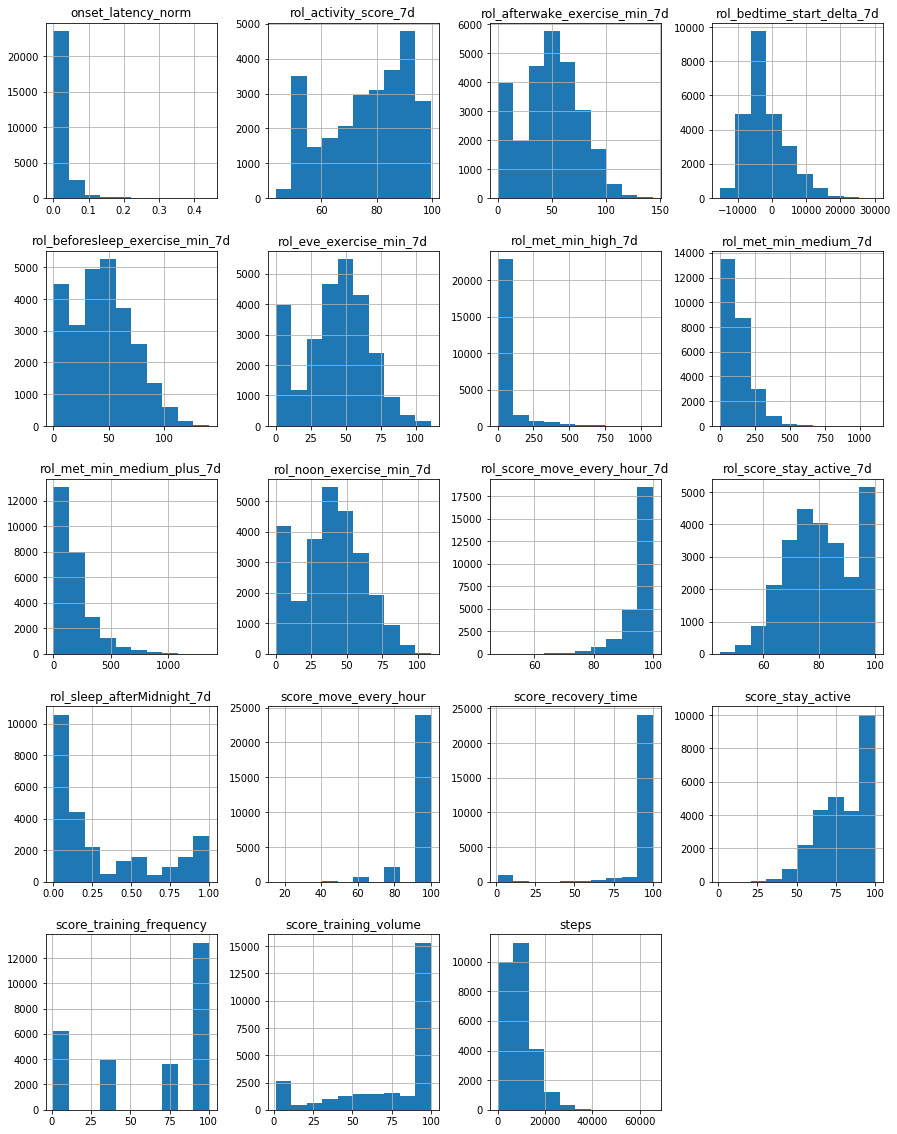

In [330]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)

We can see above that there are quite a few gaussian like distributions and many where there is skewness. This tells us that we may need to fit non linear models for this dataset where these properties may be less of a problem.

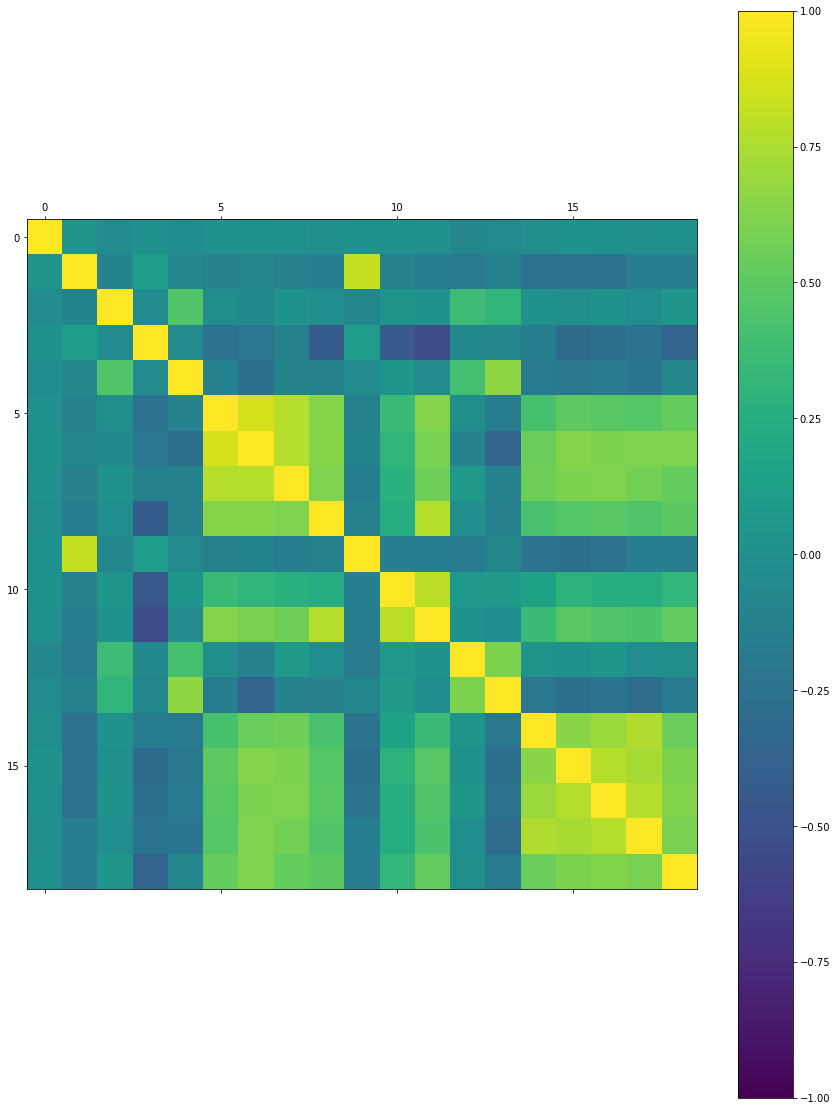

In [331]:
# correlation matrix
fig = pyplot.figure(figsize = (15,20))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

It looks like there is also some structure in the order of the attributes. The yellow-green around
the diagonal suggests that attributes that are next to each other are generally more correlated
with each other. The blue patches also suggest some moderate negative correlation the further
attributes are away from each other in the ordering.

In [332]:
dataset.describe()

,onset_latency_norm,rol_bedtime_start_delta_7d,score_move_every_hour,score_recovery_time,score_stay_active,score_training_frequency,score_training_volume,rol_activity_score_7d,rol_met_min_medium_7d,rol_sleep_afterMidnight_7d,rol_met_min_high_7d,rol_met_min_medium_plus_7d,rol_score_move_every_hour_7d,rol_score_stay_active_7d,rol_beforesleep_exercise_min_7d,rol_afterwake_exercise_min_7d,rol_noon_exercise_min_7d,rol_eve_exercise_min_7d,steps
count,26909.000,25371.000,26909.000,26909.000,26909.000,26909.000,26909.000,26340.000,26340.000,26315.000,26340.000,26340.000,26340.000,26340.000,26315.000,26315.000,26340.000,26340.000,26909.000
mean,0.024,-1719.001,95.772,94.539,81.187,64.052,74.847,76.472,128.145,0.304,51.016,179.161,95.775,81.064,43.906,48.688,38.781,42.543,8805.244
std,0.026,5892.219,9.540,19.625,16.317,40.098,32.665,15.036,104.820,0.353,108.970,168.380,5.493,12.409,27.320,27.600,22.918,24.057,6388.854
min,0.000,-15279.429,15.000,1.000,1.000,1.000,1.000,43.429,0.000,0.000,0.000,0.000,47.571,44.429,0.000,0.000,0.000,0.000,0.000
25%,0.009,-5845.071,95.000,100.000,69.000,40.000,56.000,64.857,56.143,0.000,1.143,67.714,94.000,71.857,24.286,31.429,24.286,28.571,4402.000
50%,0.017,-3108.714,100.000,100.000,82.000,71.000,95.000,79.286,107.571,0.143,7.857,136.286,97.857,80.143,43.333,50.000,40.000,45.000,8388.000
75%,0.031,1582.857,100.000,100.000,98.000,100.000,99.000,89.571,176.893,0.571,43.714,235.143,99.286,90.750,62.143,67.500,54.286,59.286,12292.000
max,0.442,30083.286,100.000,100.000,100.000,100.000,100.000,99.571,1108.714,1.000,1083.571,1353.143,100.000,100.000,140.000,143.333,109.286,110.714,65535.000


In [333]:
pd.isnull(dataset).sum() > 0

onset_latency_norm                 False
rol_bedtime_start_delta_7d          True
score_move_every_hour              False
score_recovery_time                False
score_stay_active                  False
score_training_frequency           False
score_training_volume              False
rol_activity_score_7d               True
rol_met_min_medium_7d               True
rol_sleep_afterMidnight_7d          True
rol_met_min_high_7d                 True
rol_met_min_medium_plus_7d          True
rol_score_move_every_hour_7d        True
rol_score_stay_active_7d            True
rol_beforesleep_exercise_min_7d     True
rol_afterwake_exercise_min_7d       True
rol_noon_exercise_min_7d            True
rol_eve_exercise_min_7d             True
steps                              False
Quality                             True
dtype: bool

In [334]:
#dataset[dataset==np.inf]=np.nan
dataset.fillna(dataset.mean(), inplace=True)

In [335]:
pd.isnull(dataset).sum() > 0

onset_latency_norm                 False
rol_bedtime_start_delta_7d         False
score_move_every_hour              False
score_recovery_time                False
score_stay_active                  False
score_training_frequency           False
score_training_volume              False
rol_activity_score_7d              False
rol_met_min_medium_7d              False
rol_sleep_afterMidnight_7d         False
rol_met_min_high_7d                False
rol_met_min_medium_plus_7d         False
rol_score_move_every_hour_7d       False
rol_score_stay_active_7d           False
rol_beforesleep_exercise_min_7d    False
rol_afterwake_exercise_min_7d      False
rol_noon_exercise_min_7d           False
rol_eve_exercise_min_7d            False
steps                              False
Quality                             True
dtype: bool

In [336]:
dataset = dataset.dropna(axis=0, subset=['Quality'])

In [337]:
pd.isnull(dataset).sum() > 0

onset_latency_norm                 False
rol_bedtime_start_delta_7d         False
score_move_every_hour              False
score_recovery_time                False
score_stay_active                  False
score_training_frequency           False
score_training_volume              False
rol_activity_score_7d              False
rol_met_min_medium_7d              False
rol_sleep_afterMidnight_7d         False
rol_met_min_high_7d                False
rol_met_min_medium_plus_7d         False
rol_score_move_every_hour_7d       False
rol_score_stay_active_7d           False
rol_beforesleep_exercise_min_7d    False
rol_afterwake_exercise_min_7d      False
rol_noon_exercise_min_7d           False
rol_eve_exercise_min_7d            False
steps                              False
Quality                            False
dtype: bool

In [338]:
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:18].astype(float)
Y = array[:,19]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

It is a good idea to use a validation hold-out set. This is a sample of the data that we hold
back from our analysis and modeling. We use it right at the end of our project to confirm the
accuracy of our final model. It is a smoke test that we can use to see if we messed up and to
give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset
for modeling and hold back 20% for validation.

In [339]:
X.shape , Y.shape

((26906, 18), (26906,))

#### Evaluating some simple algorithms

We don't know what algorithms will do well on this dataset. Gut feel suggests distance based
algorithms like k-Nearest Neighbors and Support Vector Machines may not do well. Let's design
our test harness. We will use 10-fold cross-validation. The dataset is not too small and this is
a good standard test harness configuration. We will evaluate algorithms using the accuracy
metric. This is a gross metric that will give a quick idea of how correct a given model is, and is
more useful on binary classification problems like this one.

Let's create a baseline of performance on this problem and spot-check a number of dierent
algorithms. We will select a suite of different algorithms capable of working on this classication
problem. The six algorithms selected include:
 Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).
 Nonlinear Algorithms: Classification and Regression Trees (CART), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [340]:
%%time
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.639239 (0.011048)
LDA: 0.654060 (0.009071)
KNN: 0.621213 (0.006484)
CART: 0.644909 (0.009063)
NB: 0.609645 (0.006502)
CPU times: user 18.3 s, sys: 25.4 s, total: 43.7 s
Wall time: 9.9 s


#### Model results

The algorithms all use default tuning parameters. Let's compare the algorithms. We will
display the mean and standard deviation of accuracy for each algorithm as we calculate it and
collect the results for use later.

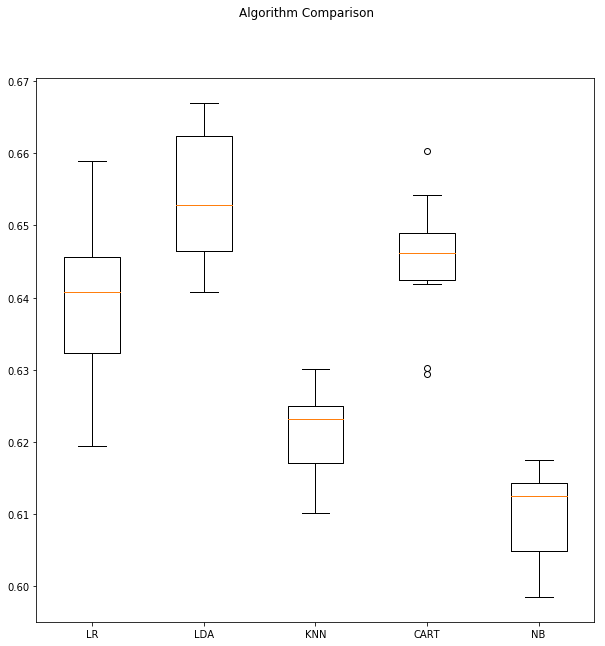

In [341]:
# Compare Algorithms
fig = pyplot.figure(figsize = (10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

These are just mean accuracy values. It is always wise to look at the distribution of accuracy
values calculated across cross-validation folds. We can do that graphically using box and whisker
plots.The results show a tight distribution for LDA, CART which is encouraging, suggesting low variance.
The poor results for NB are surprising.

__note:__ : It is possible that the varied distribution of the attributes is having an effect on the accuracy
of algorithms such as NB. In the next section we will repeat this spot-check with a standardized
copy of the training dataset.

#### Standardizing the dataset

We suspect that the diiffering distributions of the raw data may be negatively impacting the skill
of some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the
dataset. This is where the data is transformed such that each attribute has a mean value of zero
and a standard deviation of one. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross-validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data.

In [342]:
%%time
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.653177 (0.009757)
ScaledLDA: 0.654060 (0.009071)
ScaledKNN: 0.698848 (0.006815)
ScaledCART: 0.647279 (0.011582)
ScaledNB: 0.633479 (0.009994)
CPU times: user 23.1 s, sys: 26.7 s, total: 49.7 s
Wall time: 14.5 s


Running the example provides the results listed below. We can see that KNN is still doing
well, even better than before. We can also see that the standardization of the data has lifted
the skill of LR & LDA to be the more accurate algorithm tested so far.

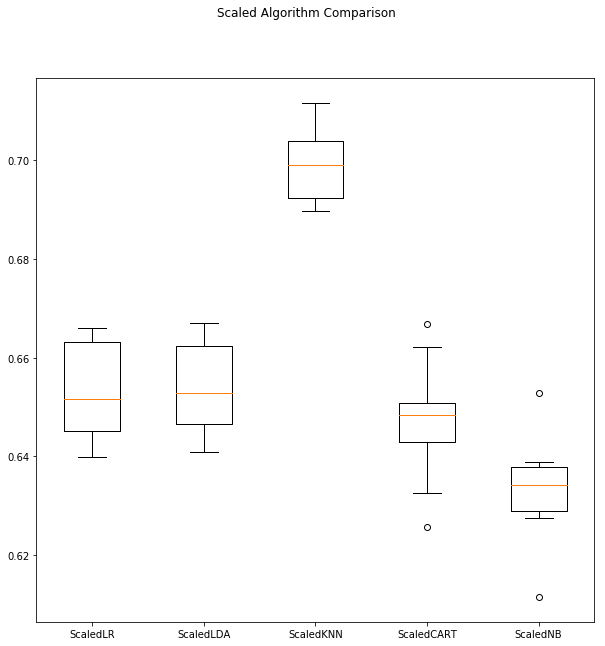

CPU times: user 380 ms, sys: 348 ms, total: 728 ms
Wall time: 302 ms


In [343]:
%%time
# Compare Algorithms
fig = pyplot.figure(figsize = (10,10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Ensemble testing

Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:
 Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
 Bagging Methods: Random Forests (RF) and Extra Trees (ET).
We will use the same test harness as before, 10-fold cross-validation. No data standardization
is used in this case because all four ensemble algorithms are based on decision trees that are
less sensitive to data distributions.

Running the example provides the following accuracy scores....

In [344]:
%%time
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.666511 (0.010473)
GBM: 0.688208 (0.011253)
RF: 0.695642 (0.010177)
ET: 0.697082 (0.006447)
CPU times: user 50.7 s, sys: 36 ms, total: 50.7 s
Wall time: 50.7 s


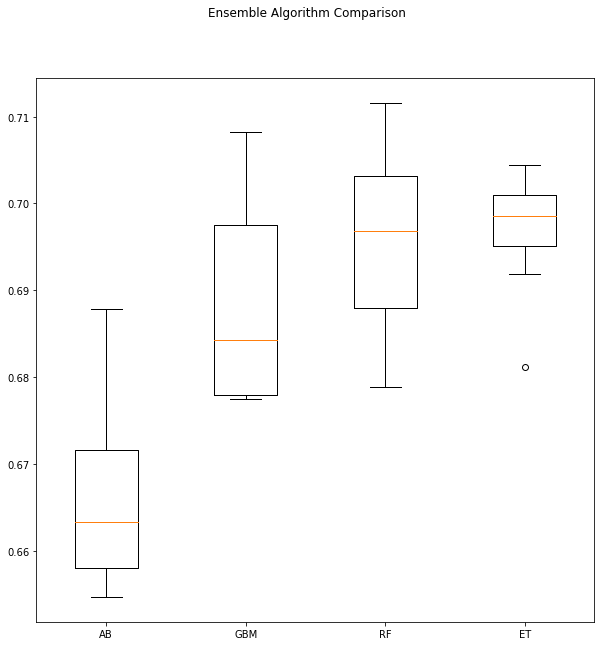

CPU times: user 448 ms, sys: 284 ms, total: 732 ms
Wall time: 314 ms


In [345]:
%%time
# Compare Algorithms
fig = pyplot.figure(figsize = (10,10))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

We can see that both boosting techniques provide MARGINALLY strong accuracy scores in the 70s
(%) with default configurations. We can plot the distribution of accuracy scores across the
cross-validation folds.

#### Final Model

The RF showed the most promise as a low complexity and stable model for this problem. In
this section we will finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to confirm our findings. A part of the findings was
that RF does not really perform better when the dataset is standardized so that all attributes have a mean
value of zero and a standard deviation of one. We can calculate this from the entire training
dataset and apply the same transform to the input attributes from the validation dataset.

In [346]:
# Finalize Model
# prepare the model

model = RandomForestClassifier()
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
predictions = model.predict(X_validation)

In [347]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6928651059085842
[[2082  673]
 [ 980 1647]]
              precision    recall  f1-score   support

         Bad       0.68      0.76      0.72      2755
        Good       0.71      0.63      0.67      2627

    accuracy                           0.69      5382
   macro avg       0.69      0.69      0.69      5382
weighted avg       0.69      0.69      0.69      5382



We can see that we achieve an accuracy of nearly 70% on the held-out validation dataset. A score that matches closely to our expectations estimated above during the tuning of RF.

## USING H2O

This is an important step to the path of productionlization of our model. We want to use H2O in order to find improvements in our models and also try to build a model object that can be shipped to our customer.

A good place to start playing with H2O is http://aquarium.h2o.ai

In [242]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,14 days 0 hours 33 mins
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.1
H2O cluster version age:,4 months and 8 days !!!
H2O cluster name:,H2O_from_python_unknownUser_m7x25t
H2O cluster total nodes:,1
H2O cluster free memory:,5.466 Gb
H2O cluster total cores:,32
H2O cluster allowed cores:,32
H2O cluster status:,"locked, healthy"


#### Load Data
For the AutoML regression iteration, we use the trimmed down simple dataset. The goal here is to predict the sleep score(1-100), given the activity and readiness from Oura data. In this iteration, you will use H2O's AutoML to outperform the state of the art results on this task.

In [348]:
dataset.shape

(26906, 20)

In [349]:
dataset.to_csv('dataset.csv', encoding='utf-8')

In [350]:
# Load data into H2O

data_path = 'dataset.csv'
df = h2o.import_file(data_path)
df = df.drop('C1')
## Convert the target label to a factor so AutoML knows this is a classification problem
df["Quality"] = df["Quality"].asfactor()
predictors = list(set(df.col_names) - set('Quality'))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [351]:
df.shape

(26906, 20)

Now that we have cleaned our data and added new columns, we train a model to predict bad loans. First split our loans data into train and test.

In [352]:
train, test = df.split_frame(seed=25, ratios=[0.75])

In [353]:
# h2o Python API with specific classes
import h2o                                        
from h2o.estimators.gbm import H2OGradientBoostingEstimator # for GBM
from h2o.grid.grid_search import H2OGridSearch 

import numpy as np   # array, vector, matrix calculations
import pandas as pd  # DataFrame handling
import shap          # for visualizing Shapley values

import matplotlib.pyplot as plt # general plotting
pd.options.display.max_columns = 999 # enable display of all columns in notebook

# display plots in-notebook
%matplotlib inline   

In [354]:
# initialize GBM model
model = H2OGradientBoostingEstimator(ntrees=150,              # maximum 150 trees in GBM
                                     max_depth=4,             # trees can have maximum depth of 4
                                     sample_rate=0.9,         # use 90% of rows in each iteration (tree)
                                     col_sample_rate=0.9,     # use 90% of variables in each iteration (tree)
                                     #balance_classes=True,   # sample to balance 0/1 distribution of target - can help LOCO
                                     stopping_rounds=5,       # stop if validation error does not decrease for 5 iterations (trees)
                                     score_tree_interval=1,   # for reproducibility, set higher for bigger data
                                     model_id='oura_gbm',      # for locating the model in Flow UI 
                                     seed=12345)              # for reproducibility

# train a GBM model
model.train(y='Quality', x=predictors, training_frame=train, validation_frame=test)

# print AUC
print('GBM Test AUC = %.2f' % model.auc(valid=True))

# uncomment to see model details
# print(model) 

gbm Model Build progress: |███████████████████████████████████████████████| 100%
GBM Test AUC = 0.78


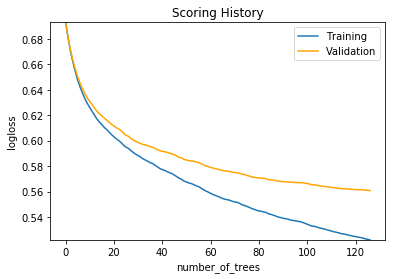

In [355]:
%matplotlib inline
model.plot()

Training Data


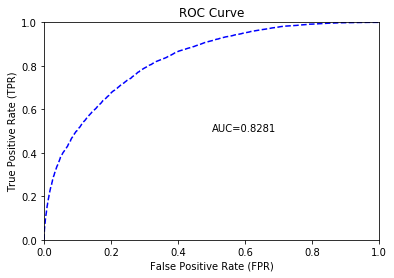

Testing Data


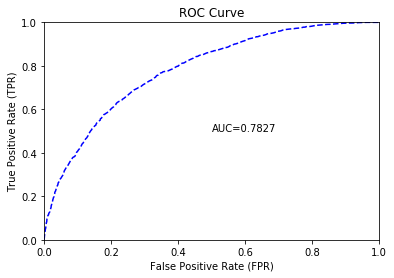

X-Val


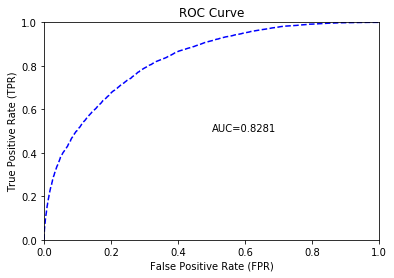

In [356]:
print("Training Data")
model.model_performance(train = True).plot()
print("Testing Data")
model.model_performance(valid = True).plot()
print("X-Val")
model.model_performance().plot()

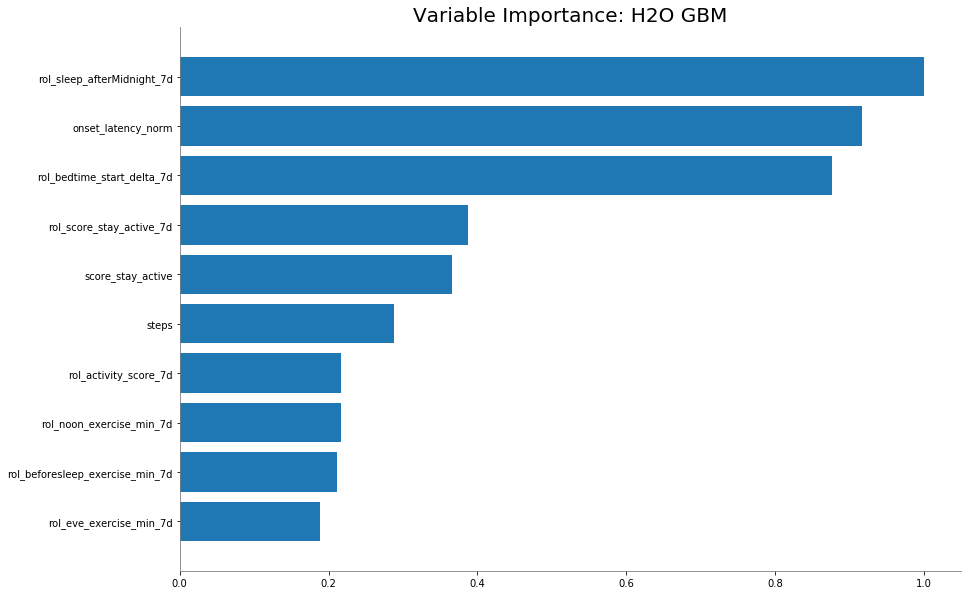

In [357]:
model.varimp_plot()

In [358]:
perf_cls = model.model_performance()
perf_cls


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1736325786502686
RMSE: 0.41669242691734704
LogLoss: 0.5219741353807957
Mean Per-Class Error: 0.2545543496113838
AUC: 0.8280825819482347
pr_auc: 0.819202567461904
Gini: 0.6561651638964694
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4178777275400175: 


,Bad,Good,Error,Rate
Bad,6127.0,4130.0,0.4027,(4130.0/10257.0)
Good,1320.0,8670.0,0.1321,(1320.0/9990.0)
Total,7447.0,12800.0,0.2692,(5450.0/20247.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4178777,0.7608600,233.0
max f2,0.2372249,0.8592818,315.0
max f0point5,0.5837705,0.7473684,153.0
max accuracy,0.4878540,0.7449005,200.0
max precision,0.9573469,1.0,0.0
max recall,0.0672491,1.0,383.0
max specificity,0.9573469,1.0,0.0
max absolute_mcc,0.4878540,0.4922802,200.0
max min_per_class_accuracy,0.5199957,0.7421273,185.0
max mean_per_class_accuracy,0.4878540,0.7454457,200.0


Gains/Lift Table: Avg response rate: 49.34 %, avg score: 49.33 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100262,0.8901588,1.9967751,1.9967751,0.9852217,0.9174944,0.9852217,0.9174944,0.0200200,0.0200200,99.6775100,99.6775100
,2,0.0200030,0.8569654,1.9865935,1.9916969,0.9801980,0.8729776,0.9827160,0.8952910,0.0198198,0.0398398,98.6593524,99.1696882
,3,0.0300291,0.8355430,1.9368718,1.9733918,0.9556650,0.8457245,0.9736842,0.8787416,0.0194194,0.0592593,93.6871847,97.3391813
,4,0.0400059,0.8203609,1.8762272,1.9491606,0.9257426,0.8277047,0.9617284,0.8660139,0.0187187,0.0779780,87.6227217,94.9160642
,5,0.0500321,0.8089153,1.9169041,1.9426966,0.9458128,0.8146919,0.9585390,0.8557292,0.0192192,0.0971972,91.6904096,94.2696596
,6,0.1000148,0.7693644,1.8444815,1.8936133,0.9100791,0.7875707,0.9343210,0.8216668,0.0921922,0.1893894,84.4481537,89.3613317
,7,0.1499975,0.7365494,1.7543603,1.8472109,0.8656126,0.7526917,0.9114257,0.7986827,0.0876877,0.2770771,75.4360289,84.7210925
,8,0.2000296,0.7056071,1.6565940,1.7995332,0.8173741,0.7202801,0.8879012,0.7790723,0.0828829,0.3599600,65.6594008,79.9533163
,9,0.2999951,0.6462662,1.4609656,1.6867145,0.7208498,0.6760000,0.8322358,0.7447262,0.1460460,0.5060060,46.0965560,68.6714456
,10,0.4000099,0.5854056,1.2740855,1.5835445,0.6286420,0.6160287,0.7813310,0.7125479,0.1274274,0.6334334,27.4085493,58.3544478


In [359]:
from h2o.estimators import H2OXGBoostEstimator

param = {
      "ntrees" : 20
    , "nfolds" : 5
    , "seed": 25
}
xgboost_model = H2OXGBoostEstimator(**param)
xgboost_model.train(x = predictors,
                    y = "Quality",
                    training_frame=train,
                    validation_frame=test)

# print AUC
print('GBM Test AUC = %.2f' % xgboost_model.auc(valid=True))

xgboost Model Build progress: |███████████████████████████████████████████| 100%
GBM Test AUC = 0.78


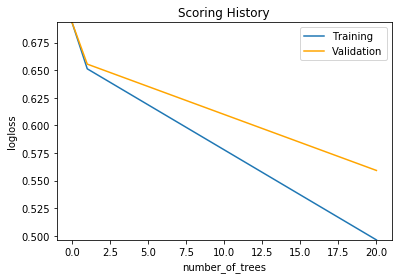

In [360]:
%matplotlib inline
xgboost_model.plot()

Training Data


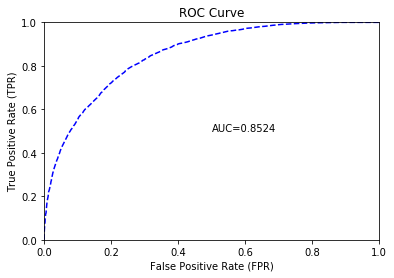

Testing Data


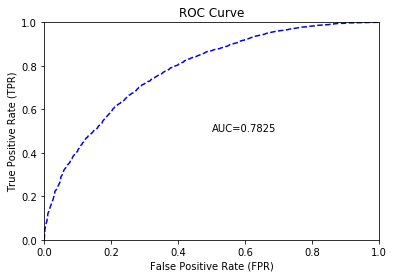

X-Val


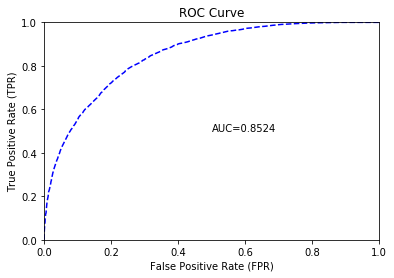

In [361]:
print("Training Data")
xgboost_model.model_performance(train = True).plot()
print("Testing Data")
xgboost_model.model_performance(valid = True).plot()
print("X-Val")
xgboost_model.model_performance().plot()

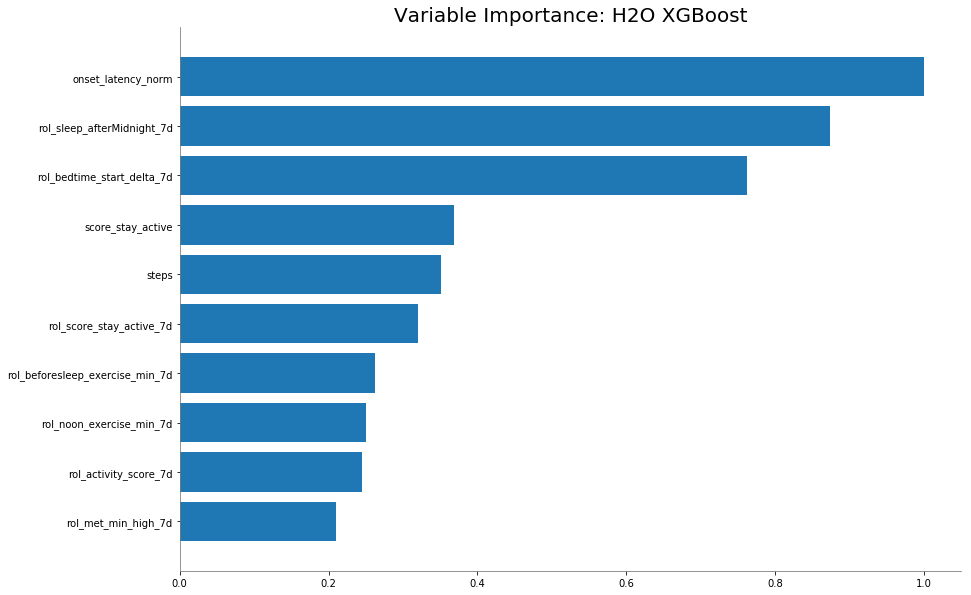

In [362]:
xgboost_model.varimp_plot()

In [363]:
perf_cls = xgboost_model.model_performance()
perf_cls


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1632280027305747
RMSE: 0.40401485459147995
LogLoss: 0.4964482474591066
Mean Per-Class Error: 0.2320305388746453
AUC: 0.8523584908882754
pr_auc: 0.8409541922861463
Gini: 0.7047169817765508
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4333660498261452: 


,Bad,Good,Error,Rate
Bad,6613.0,3644.0,0.3553,(3644.0/10257.0)
Good,1262.0,8728.0,0.1263,(1262.0/9990.0)
Total,7875.0,12372.0,0.2423,(4906.0/20247.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4333660,0.7806100,227.0
max f2,0.2834783,0.8693319,294.0
max f0point5,0.6168872,0.7687362,140.0
max accuracy,0.5072143,0.7677187,192.0
max precision,0.9764546,1.0,0.0
max recall,0.1004710,1.0,368.0
max specificity,0.9764546,1.0,0.0
max absolute_mcc,0.5072143,0.5361495,192.0
max min_per_class_accuracy,0.5208838,0.7641611,185.0
max mean_per_class_accuracy,0.5072143,0.7679695,192.0


Gains/Lift Table: Avg response rate: 49.34 %, avg score: 49.35 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100262,0.9062322,2.0167429,2.0167429,0.9950739,0.9349229,0.9950739,0.9349229,0.0202202,0.0202202,101.6742851,101.6742851
,2,0.0200030,0.8739743,1.9665269,1.9916969,0.9702970,0.8883470,0.9827160,0.9116924,0.0196196,0.0398398,96.6526923,99.1696882
,3,0.0300291,0.8508431,1.9268880,1.9700584,0.9507389,0.8623116,0.9720395,0.8952051,0.0193193,0.0591592,92.6887972,97.0058381
,4,0.0400059,0.8341104,1.9364270,1.9616713,0.9554455,0.8427292,0.9679012,0.8821185,0.0193193,0.0784785,93.6427021,96.1671301
,5,0.0500321,0.8210818,1.9568396,1.9607031,0.9655172,0.8271535,0.9674235,0.8711038,0.0196196,0.0980981,95.6839598,96.0703053
,6,0.1000148,0.7796042,1.8625058,1.9116287,0.9189723,0.7995049,0.9432099,0.8353221,0.0930931,0.1911912,86.2505786,91.1628666
,7,0.1500469,0.7446277,1.7926428,1.8719537,0.8845015,0.7615933,0.9236340,0.8107377,0.0896897,0.2808809,79.2642791,87.1953652
,8,0.2000296,0.7130444,1.7062956,1.8305596,0.8418972,0.7284800,0.9032099,0.7901834,0.0852853,0.3661662,70.6295624,83.0559597
,9,0.2999951,0.6491824,1.5310599,1.7307592,0.7554348,0.6808775,0.8539677,0.7537601,0.1530531,0.5192192,53.1059864,73.0759225
,10,0.4000099,0.5895504,1.3131187,1.6263362,0.6479012,0.6198461,0.8024447,0.7202775,0.1313313,0.6505506,31.3118748,62.6336214


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


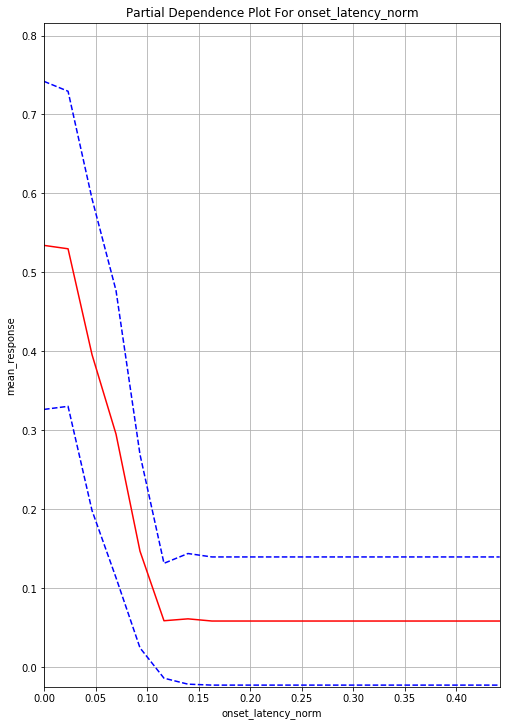

In [364]:
pdp = xgboost_model.partial_plot(cols=["onset_latency_norm"], data=train)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


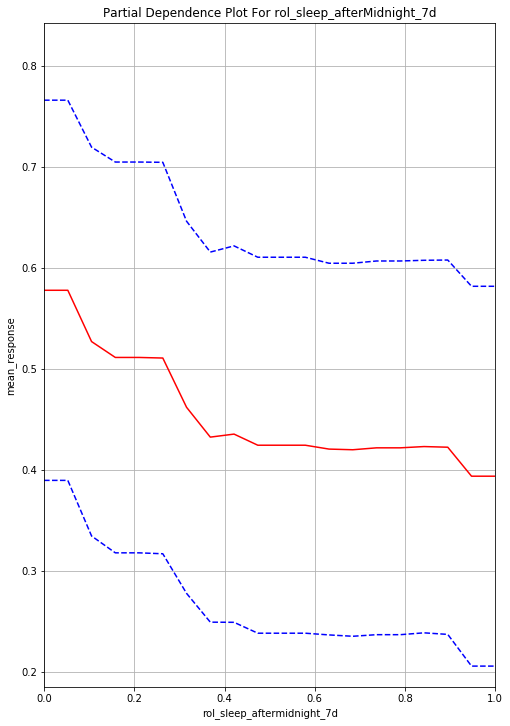

In [365]:
pdp = xgboost_model.partial_plot(cols=["rol_sleep_afterMidnight_7d"], data=train)

#### H2O AutoML


Although H2O has made it easy for non-experts to experiment with machine learning, there is still a fair bit of knowledge and background in data science that is required to produce high-performing machine learning models. Deep Neural Networks in particular are notoriously difficult for a non-expert to tune properly. In order for machine learning software to truly be accessible to non-experts, we have designed an easy-to-use interface which automates the process of training a large selection of candidate models. H2O’s AutoML can also be a helpful tool for the advanced user, by providing a simple wrapper function that performs a large number of modeling-related tasks that would typically require many lines of code, and by freeing up their time to focus on other aspects of the data science pipeline tasks such as data-preprocessing, feature engineering and model deployment.

H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles – one based on all previously trained models, another one on the best model of each family – will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

In [374]:
%%time
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models=5, 
                max_runtime_secs_per_model=60, 
                include_algos = ["GBM", "GLM", "DRF", "XGBoost"],
                seed=25)
aml.train(x=predictors, y='Quality', training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 4.12 s, sys: 300 ms, total: 4.42 s
Wall time: 3min 34s


In [375]:
lb = aml.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
DRF_1_AutoML_20191124_002527,0.805291,0.536337,0.293953,0.425168,0.180767
XGBoost_2_AutoML_20191124_002527,0.795772,0.558291,0.299488,0.433835,0.188213
XGBoost_1_AutoML_20191124_002527,0.791215,0.562211,0.297868,0.435832,0.18995
XGBoost_3_AutoML_20191124_002527,0.751824,0.59556,0.333849,0.45246,0.20472
GLM_grid_1_AutoML_20191124_002527_model_1,0.708875,0.620609,0.377081,0.46494,0.216169


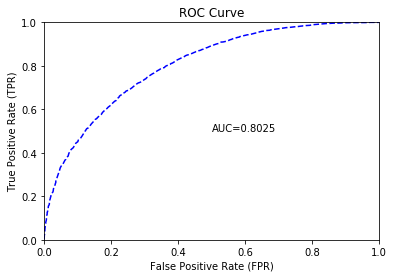


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.18201301870925107
RMSE: 0.42662983804376725
LogLoss: 0.5389423442186665
Mean Per-Class Error: 0.27981179608960405
AUC: 0.8024683310901434
pr_auc: 0.7800243442694492
Gini: 0.6049366621802867
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3913349270921986: 


,Bad,Good,Error,Rate
Bad,1887.0,1571.0,0.4543,(1571.0/3458.0)
Good,426.0,2775.0,0.1331,(426.0/3201.0)
Total,2313.0,4346.0,0.2999,(1997.0/6659.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3913349,0.7353915,245.0
max f2,0.2539134,0.8477035,310.0
max f0point5,0.5536645,0.7156856,171.0
max accuracy,0.5400935,0.7209791,177.0
max precision,0.9971132,1.0,0.0
max recall,0.0288519,1.0,390.0
max specificity,0.9971132,1.0,0.0
max absolute_mcc,0.4661497,0.4423586,211.0
max min_per_class_accuracy,0.5136862,0.7191503,189.0
max mean_per_class_accuracy,0.5136862,0.7201882,189.0


Gains/Lift Table: Avg response rate: 48.07 %, avg score: 49.50 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100616,0.9434623,1.9871402,1.9871402,0.9552239,0.9666684,0.9552239,0.9666684,0.0199938,0.0199938,98.7140213,98.7140213
,2,0.0204235,0.9183673,1.9295419,1.9579176,0.9275362,0.9308682,0.9411765,0.9485050,0.0199938,0.0399875,92.9541946,95.7917563
,3,0.0300345,0.8952150,1.9827739,1.9658716,0.953125,0.9054872,0.945,0.9347393,0.0190565,0.0590440,98.2773938,96.5871603
,4,0.0400961,0.8771482,1.8939930,1.9478347,0.9104478,0.8867519,0.9363296,0.9226975,0.0190565,0.0781006,89.3993015,94.7834654
,5,0.0500075,0.8608658,1.8596509,1.9303568,0.8939394,0.8681055,0.9279279,0.9118775,0.0184317,0.0965323,85.9650867,93.0356786
,6,0.1000150,0.8022484,1.8366501,1.8835035,0.8828829,0.8304892,0.9054054,0.8711833,0.0918463,0.1883786,83.6650146,88.3503466
,7,0.1500225,0.7545596,1.7054608,1.8241559,0.8198198,0.7763513,0.8768769,0.8395727,0.0852858,0.2736645,70.5460850,82.4155927
,8,0.2000300,0.7116075,1.5930129,1.7663702,0.7657658,0.7324253,0.8490991,0.8127858,0.0796626,0.3533271,59.3012882,76.6370166
,9,0.3001952,0.6487180,1.4097300,1.6473712,0.6776612,0.6795331,0.7918959,0.7683238,0.1412059,0.4945330,40.9729999,64.7371171
,10,0.4000601,0.5793575,1.2387877,1.5453787,0.5954887,0.6151148,0.7428679,0.7300790,0.1237113,0.6182443,23.8787691,54.5378673


In [376]:
aml.leader.model_performance(test_data=test).plot()
aml.leader.model_performance(test_data=test)

In [377]:
# Get the best non-ensemble model
model1 = h2o.get_model(lb[0,"model_id"])

In [378]:
perf_cls = model1.model_performance()
perf_cls


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.18561399068124107
RMSE: 0.43082942179154976
LogLoss: 0.5601690791932443
Mean Per-Class Error: 0.28392645350820256
AUC: 0.7928014833591512
pr_auc: 0.7742341341125886
Gini: 0.5856029667183025
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37127196575676547: 


,Bad,Good,Error,Rate
Bad,5321.0,4936.0,0.4812,(4936.0/10257.0)
Good,1285.0,8705.0,0.1286,(1285.0/9990.0)
Total,6606.0,13641.0,0.3073,(6221.0/20247.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3712720,0.7367441,262.0
max f2,0.1707834,0.8472919,342.0
max f0point5,0.5521526,0.7196422,179.0
max accuracy,0.4978006,0.7158591,205.0
max precision,0.9776760,0.9802956,7.0
max recall,0.0000269,1.0,399.0
max specificity,0.9997857,0.9997075,0.0
max absolute_mcc,0.4978006,0.4322650,205.0
max min_per_class_accuracy,0.5077538,0.7148148,201.0
max mean_per_class_accuracy,0.4978006,0.7160735,205.0


Gains/Lift Table: Avg response rate: 49.34 %, avg score: 49.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100262,0.9749057,1.9867912,1.9867912,0.9802956,0.9910898,0.9802956,0.9910898,0.0199199,0.0199199,98.6791225,98.6791225
,2,0.0200030,0.9408590,1.9163604,1.9516628,0.9455446,0.9554100,0.9629630,0.9732940,0.0191191,0.0390390,91.6360420,95.1662774
,3,0.0300291,0.9187726,1.8270492,1.9100566,0.9014778,0.9295882,0.9424342,0.9587014,0.0183183,0.0573574,82.7049217,91.0056603
,4,0.0400059,0.9000735,1.8561606,1.8966159,0.9158416,0.9089251,0.9358025,0.9462881,0.0185185,0.0758759,85.6160616,89.6615875
,5,0.0500321,0.8843638,1.8570008,1.8886772,0.9162562,0.8923294,0.9318855,0.9354750,0.0186186,0.0944945,85.7000843,88.8677226
,6,0.1000148,0.8190338,1.7343333,1.8115434,0.8557312,0.8491270,0.8938272,0.8923223,0.0866867,0.1811812,73.4333345,81.1543395
,7,0.1499975,0.7674148,1.6181771,1.7471092,0.7984190,0.7926486,0.8620349,0.8591087,0.0808809,0.2620621,61.8177070,74.7109177
,8,0.2000296,0.7243566,1.5705632,1.7029509,0.7749260,0.7457094,0.8402469,0.8307449,0.0785786,0.3406406,57.0563159,70.2950877
,9,0.2999951,0.6511634,1.4299238,1.6119718,0.7055336,0.6876441,0.7953573,0.7830603,0.1429429,0.4835836,42.9923797,61.1971817
,10,0.4000099,0.5804001,1.2600736,1.5239864,0.6217284,0.6167075,0.7519447,0.7414670,0.1260260,0.6096096,26.0073555,52.3986389


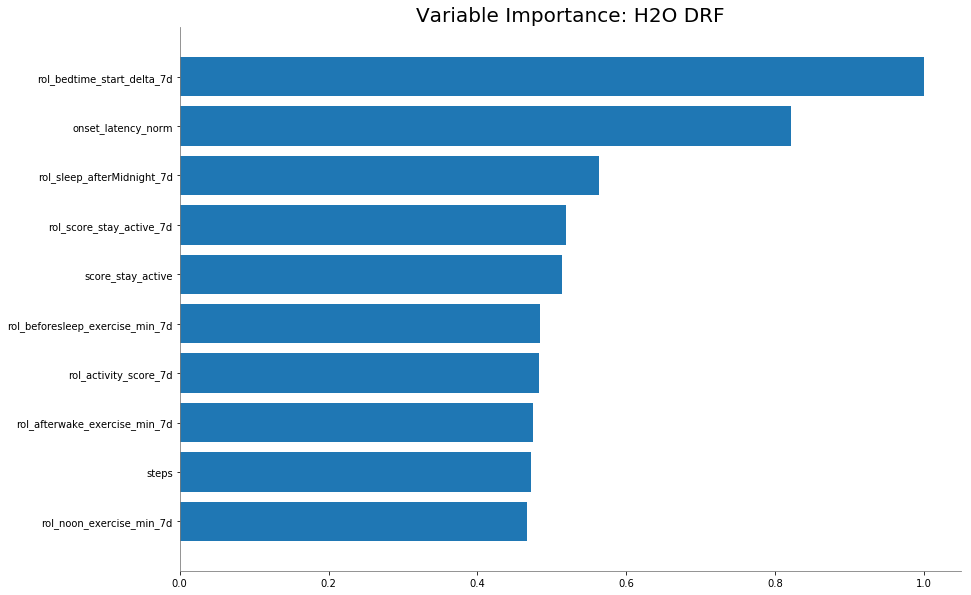

In [380]:
model1.varimp_plot()

In [381]:
print(model1)
print('Generate predictions…')
test_y = model1.predict(test)
test_y = test_y.as_data_frame()
print(test_y)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20191124_002527

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,49.0,49.0,1660708.0,20.0,20.0,20.0,2345.0,2997.0,2694.0815




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.18561399068124107
RMSE: 0.43082942179154976
LogLoss: 0.5601690791932443
Mean Per-Class Error: 0.28392645350820256
AUC: 0.7928014833591512
pr_auc: 0.7742341341125886
Gini: 0.5856029667183025
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37127196575676547: 


,Bad,Good,Error,Rate
Bad,5321.0,4936.0,0.4812,(4936.0/10257.0)
Good,1285.0,8705.0,0.1286,(1285.0/9990.0)
Total,6606.0,13641.0,0.3073,(6221.0/20247.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3712720,0.7367441,262.0
max f2,0.1707834,0.8472919,342.0
max f0point5,0.5521526,0.7196422,179.0
max accuracy,0.4978006,0.7158591,205.0
max precision,0.9776760,0.9802956,7.0
max recall,0.0000269,1.0,399.0
max specificity,0.9997857,0.9997075,0.0
max absolute_mcc,0.4978006,0.4322650,205.0
max min_per_class_accuracy,0.5077538,0.7148148,201.0
max mean_per_class_accuracy,0.4978006,0.7160735,205.0


Gains/Lift Table: Avg response rate: 49.34 %, avg score: 49.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100262,0.9749057,1.9867912,1.9867912,0.9802956,0.9910898,0.9802956,0.9910898,0.0199199,0.0199199,98.6791225,98.6791225
,2,0.0200030,0.9408590,1.9163604,1.9516628,0.9455446,0.9554100,0.9629630,0.9732940,0.0191191,0.0390390,91.6360420,95.1662774
,3,0.0300291,0.9187726,1.8270492,1.9100566,0.9014778,0.9295882,0.9424342,0.9587014,0.0183183,0.0573574,82.7049217,91.0056603
,4,0.0400059,0.9000735,1.8561606,1.8966159,0.9158416,0.9089251,0.9358025,0.9462881,0.0185185,0.0758759,85.6160616,89.6615875
,5,0.0500321,0.8843638,1.8570008,1.8886772,0.9162562,0.8923294,0.9318855,0.9354750,0.0186186,0.0944945,85.7000843,88.8677226
,6,0.1000148,0.8190338,1.7343333,1.8115434,0.8557312,0.8491270,0.8938272,0.8923223,0.0866867,0.1811812,73.4333345,81.1543395
,7,0.1499975,0.7674148,1.6181771,1.7471092,0.7984190,0.7926486,0.8620349,0.8591087,0.0808809,0.2620621,61.8177070,74.7109177
,8,0.2000296,0.7243566,1.5705632,1.7029509,0.7749260,0.7457094,0.8402469,0.8307449,0.0785786,0.3406406,57.0563159,70.2950877
,9,0.2999951,0.6511634,1.4299238,1.6119718,0.7055336,0.6876441,0.7953573,0.7830603,0.1429429,0.4835836,42.9923797,61.1971817
,10,0.4000099,0.5804001,1.2600736,1.5239864,0.6217284,0.6167075,0.7519447,0.7414670,0.1260260,0.6096096,26.0073555,52.3986389




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.18076745716248843
RMSE: 0.42516756362931596
LogLoss: 0.536337168645659
Mean Per-Class Error: 0.2723762955702119
AUC: 0.805291335012501
pr_auc: 0.7937552226500023
Gini: 0.6105826700250021
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38420794252912666: 


,Bad,Good,Error,Rate
Bad,5539.0,4718.0,0.46,(4718.0/10257.0)
Good,1278.0,8712.0,0.1279,(1278.0/9990.0)
Total,6817.0,13430.0,0.2961,(5996.0/20247.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3842079,0.7439795,258.0
max f2,0.2375808,0.8527466,319.0
max f0point5,0.5645368,0.7283482,173.0
max accuracy,0.4979156,0.7274164,205.0
max precision,0.9983647,1.0,0.0
max recall,0.0076657,1.0,397.0
max specificity,0.9983647,1.0,0.0
max absolute_mcc,0.4957914,0.4554031,206.0
max min_per_class_accuracy,0.5099119,0.7266266,199.0
max mean_per_class_accuracy,0.4979156,0.7276237,205.0


Gains/Lift Table: Avg response rate: 49.34 %, avg score: 49.51 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100262,0.9506803,2.0067590,2.0067590,0.9901478,0.9707520,0.9901478,0.9707520,0.0201201,0.0201201,100.6758976,100.6758976
,2,0.0200030,0.9203144,1.9163604,1.9616713,0.9455446,0.9340720,0.9679012,0.9524573,0.0191191,0.0392392,91.6360420,96.1671301
,3,0.0300291,0.8988639,1.8769686,1.9333906,0.9261084,0.9091436,0.9539474,0.9379956,0.0188188,0.0580581,87.6968594,93.3390627
,4,0.0400059,0.8814778,1.8962938,1.9241393,0.9356436,0.8895751,0.9493827,0.9259204,0.0189189,0.0769770,89.6293819,92.4139325
,5,0.0500321,0.8654310,1.8869525,1.9166873,0.9310345,0.8730621,0.9457058,0.9153278,0.0189189,0.0958959,88.6952470,91.6687270
,6,0.1000148,0.8074512,1.7803953,1.8485749,0.8784585,0.8347356,0.9120988,0.8750516,0.0889890,0.1848849,78.0395316,84.8574945
,7,0.1499975,0.7582169,1.6802606,1.7924886,0.8290514,0.7818539,0.8844254,0.8439960,0.0839840,0.2688689,68.0260597,79.2488636
,8,0.2000296,0.7174813,1.5585589,1.7339773,0.7690030,0.7374188,0.8555556,0.8173385,0.0779780,0.3468468,55.8558855,73.3977311
,9,0.2999951,0.6477744,1.4279211,1.6319922,0.7045455,0.6825885,0.8052354,0.7724366,0.1427427,0.4895896,42.7921103,63.1992167
,10,0.4000099,0.5782739,1.2830932,1.5447566,0.6330864,0.6129972,0.7621929,0.7325718,0.1283283,0.6179179,28.3093167,54.4756647



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.708648,0.0053037,0.7185185,0.7022222,0.70857,0.698691,0.7152383
auc,0.805364,0.0037153,0.8025261,0.7971551,0.8098322,0.8118931,0.8054137
err,0.2913520,0.0053037,0.2814815,0.2977778,0.29143,0.3013090,0.2847617
err_count,1179.8,21.458797,1140.0,1206.0,1180.0,1220.0,1153.0
f0point5,0.6888585,0.0054856,0.7019028,0.6845001,0.6892058,0.6783901,0.6902938
f1,0.7451957,0.0035579,0.7443946,0.7400862,0.7529313,0.7486609,0.7399052
f2,0.811975,0.0122274,0.7923628,0.8054982,0.8296419,0.8351719,0.7972001
lift_top_group,2.0171895,0.0245941,2.0199502,2.018943,2.0044553,1.967253,2.075346
logloss,0.5363367,0.0030037,0.5399338,0.5425504,0.5335148,0.531069,0.5346154
max_per_class_error,0.4430072,0.0304983,0.3887531,0.4486301,0.4721538,0.5041646,0.4013346


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-11-24 00:28:53,22.243 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-11-24 00:28:54,22.679 sec,5.0,0.5172048,5.0698474,0.6848537,0.4825530,1.3127453,0.3771930
,2019-11-24 00:28:54,23.143 sec,10.0,0.4762516,2.3376235,0.7261786,0.6002926,1.4601282,0.3601376
,2019-11-24 00:28:54,23.552 sec,15.0,0.4548624,1.2076214,0.7531205,0.6795574,1.5858850,0.3455130
,2019-11-24 00:28:55,23.973 sec,20.0,0.4459158,0.8414366,0.7657744,0.7163848,1.6661770,0.3252828
,2019-11-24 00:28:55,24.402 sec,25.0,0.4397963,0.6921543,0.7756907,0.7411804,1.8183716,0.3216279
,2019-11-24 00:28:56,24.841 sec,30.0,0.4372197,0.6346843,0.7802936,0.7516531,1.8969363,0.3176767
,2019-11-24 00:28:56,25.264 sec,35.0,0.4348073,0.5967972,0.7847641,0.7610293,1.9468557,0.3121944
,2019-11-24 00:28:57,25.681 sec,40.0,0.4332555,0.5796614,0.7879405,0.7662356,1.9568396,0.3115029
,2019-11-24 00:28:57,26.120 sec,45.0,0.4318122,0.5653994,0.7907660,0.7714558,1.9668235,0.3167383


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
rol_bedtime_start_delta_7d,15845.2607422,1.0,0.1191766
onset_latency_norm,13015.3701172,0.8214046,0.0978922
rol_sleep_afterMidnight_7d,8937.6201172,0.5640564,0.0672223
rol_score_stay_active_7d,8217.2060547,0.5185908,0.0618039
score_stay_active,8147.2011719,0.5141727,0.0612774
rol_beforesleep_exercise_min_7d,7669.7568359,0.4840411,0.0576864
rol_activity_score_7d,7649.4941406,0.4827623,0.0575340
rol_afterwake_exercise_min_7d,7531.9301758,0.4753428,0.0566497
steps,7481.1323242,0.4721369,0.0562677
rol_noon_exercise_min_7d,7397.4619141,0.4668564,0.0556384



Generate predictions…
drf prediction progress: |████████████████████████████████████████████████| 100%
     predict    Bad   Good
0        Bad  0.818  0.182
1        Bad  0.826  0.174
2        Bad  0.901  0.099
3        Bad  0.939  0.061
4        Bad  0.753  0.247
5        Bad  0.809  0.191
6       Good  0.523  0.477
7        Bad  0.816  0.184
8        Bad  0.676  0.324
9        Bad  0.693  0.307
10       Bad  0.672  0.328
11      Good  0.510  0.490
12      Good  0.499  0.501
13      Good  0.605  0.395
14      Good  0.327  0.673
15      Good  0.611  0.389
16      Good  0.564  0.436
17      Good  0.603  0.397
18      Good  0.507  0.493
19       Bad  0.872  0.128
20      Good  0.487  0.513
21       Bad  0.803  0.197
22      Good  0.522  0.478
23       Bad  0.664  0.336
24       Bad  0.903  0.097
25       Bad  0.781  0.219
26      Good  0.581  0.419
27       Bad  0.891  0.109
28       Bad  0.857  0.143
29       Bad  0.756  0.244
30       Bad  0.783  0.217
31       Bad  0.841  0.159
32   

[6659 rows x 3 columns]


In [382]:
sh = model1.score_history()
sh = pd.DataFrame(sh)


In [383]:
sh.columns

Index(['', 'timestamp', 'duration', 'number_of_trees', 'training_rmse', 'training_logloss',
       'training_auc', 'training_pr_auc', 'training_lift', 'training_classification_error'],
      dtype='object')

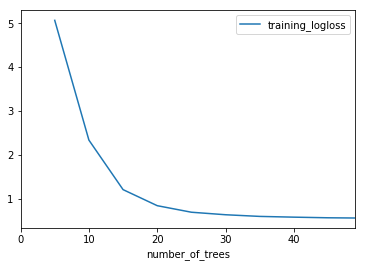

In [385]:
import matplotlib.pyplot as plt
%matplotlib inline 
# plot training training_rmse and training_mae
sh.plot(x='number_of_trees', y = ['training_logloss'])

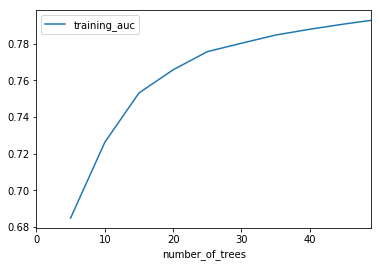

In [387]:
import matplotlib.pyplot as plt
%matplotlib inline 
# plot training training_rmse and training_mae
sh.plot(x='number_of_trees', y = ['training_auc'])

#### Explain  Predictive Models to Business Stakeholders using LIME with Python and H2O
#### Describing complex models and generating reason codes with Local Interpretable Model-agnostic Explanations (LIME) and LIME-variants

Local Interpretable Model-agnostic Explanations (LIME) shed light on how almost any machine learning model makes decisions for specific rows of data. LIME builds local linear surrogate models around observations of interest and leverages the highly interpretable properties of linear models to increase transparency and accountability for the corresponding model predictions. In this notebook, an h2o GBM is trained on the UCI credit card default data and then predictions for a highly risky customer are explained using linear model coefficients and LIME-derived reason codes. The notebook concludes by introducing a variant of LIME that is easier to execute on new data and that can be analyzed alongside observed (i.e., not simulated) data.

**Note**: As of the h2o 3.24 "Yates" release, Shapley values are supported in h2o. Shapley values can be used in place of or along with LIME. To see Shapley values for an h2o GBM in action please see: https://github.com/jphall663/interpretable_machine_learning_with_python/blob/master/dia.ipynb.


### LIME to generate descriptions for a local region with a perturbed sample

LIME was originally described in the context of explaining image or text classification decisions here: http://www.kdd.org/kdd2016/papers/files/rfp0573-ribeiroA.pdf. It can certainly also be applied to business or customer data, as will be done in the remaining sections of this notebook. Multiple Python implementations of LIME are available from the original authors of LIME, from the eli5 package, from the skater package, and probably others. However, this notebook uses a simple, step-by-step implementation of LIME for instructional purposes. 

A linear model cannot be built on a single observation, so LIME typically requires that a set of rows similar to the row of interest be simulated. This set of records are scored using the complex model to be explained. Then the records are weighted by their closeness to the record of interest, and a regularized linear model is trained on this weighted explanatory set. The parameters of the linear model and LIME-derived reason codes are then used to explain the prediction for the selected record. Because simulation of new points can seem abstract to some practicioners and simulation and distance calculations can be somewhat burdensome for creating explanations quickly in mission-critical applications, this notebook also presents a variation of LIME in which a more practical sample, instead of a perturbed, simulated sample, is used to create a local region in which to fit a linear model.


In [389]:
test.head

onset_latency_norm,rol_bedtime_start_delta_7d,score_move_every_hour,score_recovery_time,score_stay_active,score_training_frequency,score_training_volume,rol_activity_score_7d,rol_met_min_medium_7d,rol_sleep_afterMidnight_7d,rol_met_min_high_7d,rol_met_min_medium_plus_7d,rol_score_move_every_hour_7d,rol_score_stay_active_7d,rol_beforesleep_exercise_min_7d,rol_afterwake_exercise_min_7d,rol_noon_exercise_min_7d,rol_eve_exercise_min_7d,steps,Quality
0.0166052,12447.6,95,100,87,71,96,71,144.857,1,2.14286,147,97.8571,69.4286,34,35,16.4286,42.1429,12704,Good
0.0184109,13882.4,100,100,85,96,96,70.2857,137,1,3.14286,140.143,97.8571,71,20.8333,49.1667,17.8571,40,11752,Bad
0.0291667,14215.7,100,100,78,71,77,78.2857,129.286,1,3,132.286,97.1429,70.1429,22.5,44.1667,26.4286,35.7143,4450,Bad
0.0832084,16324.9,95,100,66,40,95,80.4286,144.143,0.833333,4,148.143,96.4286,71.5714,18.3333,47.5,22.8571,31.4286,6331,Bad
0.0262712,15050.1,95,100,61,40,89,79.7143,119.429,0.857143,3,122.429,95.7143,70,30,49.2857,20.7143,29.2857,5455,Good
0.0513245,15322.4,100,100,67,40,83,79.4286,116.857,0.857143,4,120.857,95.7143,67.8571,32.8571,58.5714,22.8571,32.1429,4999,Bad
0.0200334,-1719,100,100,99,96,81,76.4718,128.145,0.303797,51.0159,179.161,95.7754,81.0641,43.9061,48.6878,38.7809,42.5428,12722,Good
0.0630631,15020.4,100,100,87,96,83,91.4286,177,1,3.14286,180.143,98.5714,89.7143,68.75,46.25,31.4286,47.1429,11968,Bad
0.0285714,10521.4,100,100,96,71,96,93.4286,129,1,1,130,98.5714,84.1429,75,42,19.2857,57.1429,15589,Bad
0.0010352,-1719,78,100,45,96,96,93.1429,183,1,4.14286,187.143,98.5714,79.1429,84,54,32.8571,63.5714,7921,Bad


<bound method H2OFrame.head of >

#### Lime

Lime is available on PyPI python package index. We can install it by calling the command `!pip install lime`. Then, we can import lime in our project.

In [390]:
row = test[test['steps'] == 12704]
row

onset_latency_norm,rol_bedtime_start_delta_7d,score_move_every_hour,score_recovery_time,score_stay_active,score_training_frequency,score_training_volume,rol_activity_score_7d,rol_met_min_medium_7d,rol_sleep_afterMidnight_7d,rol_met_min_high_7d,rol_met_min_medium_plus_7d,rol_score_move_every_hour_7d,rol_score_stay_active_7d,rol_beforesleep_exercise_min_7d,rol_afterwake_exercise_min_7d,rol_noon_exercise_min_7d,rol_eve_exercise_min_7d,steps,Quality
0.0166052,12447.6,95,100,87,71,96,71,144.857,1,2.14286,147,97.8571,69.4286,34,35,16.4286,42.1429,12704,Good


In [392]:
# summarize split
print('Train data rows = %d, columns = %d' % (train.shape[0], train.shape[1]))
print('Test data rows = %d, columns = %d' % (test.shape[0], test.shape[1]))

Train data rows = 20247, columns = 20
Test data rows = 6659, columns = 20


It expects train set features in numpy format and feature names list. Optionally, we can pass the label class names but this is not a must. Probability index values will be assigned if class names would not be set. Label classes are already 0 and 1 in our data set. That’s why, I would not set class names.

Firstly, we need to find feature names. Columns function of h2o frame will return column names. Target label is on the right of the data set. We can discard the target label with passing index from 0 to -1.

In [394]:
import lime
import lime.lime_tabular

In [399]:
feature_names = train.columns[0: -1]

In [400]:
train_features_numpy = train[feature_names].as_data_frame().values

#### Explaining instance

We’ve already created the explainer. It has an explain instance function. It expects the features of an instance in numpy format, prediction function and total number of features to show.

In [401]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_features_numpy, feature_names = feature_names)

In [403]:
idx = 17
validation_df = test.as_data_frame()
instance_numpy = validation_df.iloc[idx].values[0:-1]

We’ve loaded the pre-trained model in model variable. Prediction function is depended on that object but here we need to create a mediator function. This function expects the features of an instance in numpy format. We can convert that numpy formatted instance to pandas data frame and h2o frame. Model expects input features in h2o frame format. Prediction function will return 3 columned frame. Its first column is prediction class whereas others are prediction class probabilities. Herein, we just need these probabilities. That’s why, we will filter predictions 1 index to end (ignored 0 index column).

In [405]:
def findPrediction(instance):
 #instance will be in type of numpy
 df = pd.DataFrame(data = instance, columns = feature_names)
 hf = h2o.H2OFrame(df)
 predictions = model.predict(hf).as_data_frame()
 
 #here predictions object is 3 columned data frame. 1st column is class prediction and others are probabilities
 #lime needs just prediction probabilities
 
 predictions = predictions.iloc[:,1:].values
 return predictions

In [406]:
exp = explainer.explain_instance(
        instance_numpy
        , findPrediction
        , num_features = len(feature_names))

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
